# Final Report -- Notebook
[ Team 8 ] Jiawen Zhang, Kaiwen Hu, Yijun Zhou

## 1: Lasso Regression Model

#### 1.1 Import Relevent Package

In [99]:
import pandas as pd
import numpy as np
from numpy import mean,std,absolute
from sklearn.model_selection import RepeatedKFold,GridSearchCV,cross_val_score,train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### 1.2 Import Data

In [70]:
# read csv and get the response and dependent variables
df = pd.read_csv("./static_sample.csv")
y = df['weighted_rating']
X = df.loc[:,~df.columns.isin(['weighted_rating'])]

# scale the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)

# split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=10)

# show the shape of data
print(f"Size of X is: {X.shape} \tSize of y is: {y.size}")
print(f"Size of X_train is: {X_train.shape} \tSize of y_train is: {y_train.size}")
print(f"Size of X_test is: {X_test.shape} \tSize of y_test is: {y_test.size}")

Size of X is: (500, 253) 	Size of y is: 500
Size of X_train is: (375, 253) 	Size of y_train is: 375
Size of X_test is: (125, 253) 	Size of y_test is: 125


#### 1.3 Building Model 

In [105]:
# parameter tuning: find the best alpha
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
lasso_alphas = np.linspace(0.000000001, 0.1, 20)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas 
gscv = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error',cv=cv, n_jobs=1) 
results = gscv.fit(X_train, y_train)

print('MAE: %.5f' % -results.best_score_) 
print('Config: %s' % results.best_params_)

# building optimal Lasso model
opt_lasso = Lasso(alpha=0.04736842157894737)
opt_lasso.fit(X_train,y_train)

MAE: 0.28512
Config: {'alpha': 0.04736842157894737}


Lasso(alpha=0.04736842157894737)

#### 1.4 Evaluate the Model

In [113]:
# R square of the optimal model
print('R squared:\t', round(opt_lasso.score(X_train, y_train)*100, 2))

# test MAE of the optimal model
y_hat = opt_model.predict(X_test)
scores = mean(absolute(y_hat-y_test))
print('Mean MAE:\t',(mean(scores)))

R squared:	 52.96
Mean MAE:	 0.2726124455139056


#### 1.5 Assumption Checking

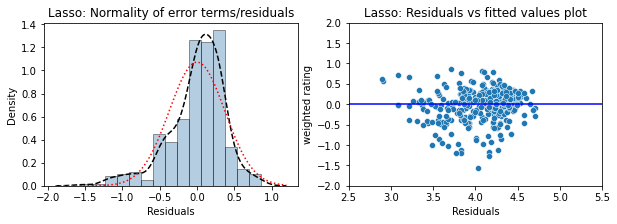

In [155]:
figure, axes= plt.subplots(1,2,figsize=(10,3),sharey=False,sharex = False)

# Normality 
sns.distplot(a= (y_train-opt_lasso.predict(X_train)) ,bins = 15, fit=stats.norm,norm_hist=True,
            ax=axes[0],
            hist_kws = {'color':'steelblue','edgecolor':'black'},
            kde_kws = {'color':'black','linestyle':'--','label':'kernal density'},
            fit_kws = {'color':'red','linestyle':':','label':'normal distribution'}).set(title='Lasso: Normality of error terms/residuals',xlabel = 'Residuals')

# Linearity & Homoscedasticity
sns.scatterplot(opt_lasso.predict(X_train),(y_train-opt_lasso.predict(X_train)),ax=axes[1]).set(title = 'Lasso: Residuals vs fitted values plot',xlabel = 'Residuals',ylabel = 'weighted rating',ylim = (-2,2),xlim=(2.5,5.5))
sns.lineplot([2.5,5.5],[0,0],color='blue',ax=axes[1])
plt.show()

## 2: Autoregressive Model

#### 2.1 import relevent package

In [156]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# uncomment the import if you want to create the autocorrelation plot from code
# from pandas import datetime
# from pandas.plotting import autocorrelation_plot
import matplotlib.image as mpimg
from sklearn.model_selection import cross_val_score,train_test_split

#### 2.2 Import Data

In [157]:
df = pd.read_csv('./dynamic_sample.csv')
df.head(5)

y = df['weight']
X = df.loc[:,~df.columns.isin(['weight'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print(f"Size of X is: {X.shape} \tSize of y is: {y.size}")
print(f"Size of X_train is: {X_train.shape} \tSize of y_train is: {y_train.size}")
print(f"Size of X_test is: {X_test.shape} \tSize of y_test is: {y_test.size}")

Size of X is: (303, 257) 	Size of y is: 303
Size of X_train is: (227, 257) 	Size of y_train is: 227
Size of X_test is: (76, 257) 	Size of y_test is: 76


#### 2.3 Modeling

In [158]:
# 2.3 modeling
X_train = sm.add_constant(X_train)
est = sm.OLS(y_train,X_train,missing='drop').fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     36.81
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.71e-58
Time:                        09:14:07   Log-Likelihood:                 72.197
No. Observations:                 215   AIC:                             51.61
Df Residuals:                     117   BIC:                             381.9
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  3.885e-08   6.58e-08      0.590      0.556   -9.14e-08    1.69e-07
rate_user_num                          1.146e-05      0.001      0.013      0.990      -0.002       0.002
latitude                                  0.0115      0.002      7.275      0.000       0.008       0.015
longitude                                 0.0058      0.002      3.188      0.002       0.002       0.009
review_count                              0.0021      0.001      2.114      0.037       0.000       0.004
price_level                               0.0185      0.007      2.583      0.011       0.004       0.033
HasTV                                    -0.0150      0.006     -2.363      0.020      -0.028      -0.002
Caters                                   -0.0376      0.009     -4.026      0.000      -0.056      -0.019
OutdoorSeating                            0.0183      0.012      1.556      0.122      -0.005       0.042
WheelchairAccessible                     -0.0046      0.010     -0.462      0.645      -0.024       0.015
BusinessParking                           0.0472      0.006      8.334      0.000       0.036       0.058
RestaurantsDelivery                      -0.0893      0.011     -8.284      0.000      -0.111      -0.068
GoodForKids                              -0.0267      0.008     -3.282      0.001      -0.043      -0.011
BikeParking                              -0.0532      0.011     -4.814      0.000      -0.075      -0.031
WiFi                                     -0.0149      0.004     -3.500      0.001      -0.023      -0.006
Alcohol                                  -0.0149      0.004     -3.500      0.001      -0.023      -0.006
RestaurantsTakeOut                       -0.0930      0.008    -11.529      0.000      -0.109      -0.077
BusinessAcceptsCreditCards               -0.0444      0.007     -6.023      0.000      -0.059      -0.030
open_days                                 0.0533      0.011      4.959      0.000       0.032       0.075
open_hours                               -0.0085      0.001    -12.664      0.000      -0.010      -0.007
num_rating                               -0.0006   6.57e-05     -9.417      0.000      -0.001      -0.000
drink                                    -0.0121      0.009     -1.279      0.203      -0.031       0.007
food                                     -0.0089      0.008     -1.114      0.268      -0.025       0.007
inside                                    0.0479      0.009      5.292      0.000       0.030       0.066
menu                                      0.0044      0.002      2.658      0.009       0.001       0.008
outside                                   0.0483      0.009      5.334      0.000       0.030       0.066
total    

#### 2.4 Evaluate the Model

In [170]:
# R squared
print('R squared:\t', round(est.rsquared, 2))

# test MAE
X_test = sm.add_constant(X_test)
y_hat = est.predict(X_test)
print("test MAE:\t", mean(absolute(y_hat-y_test)))

R squared:	 0.97
test MAE:	 0.3199288112547139
